In [10]:
import pandas as pd
df=pd.read_csv("diabetes.csv")

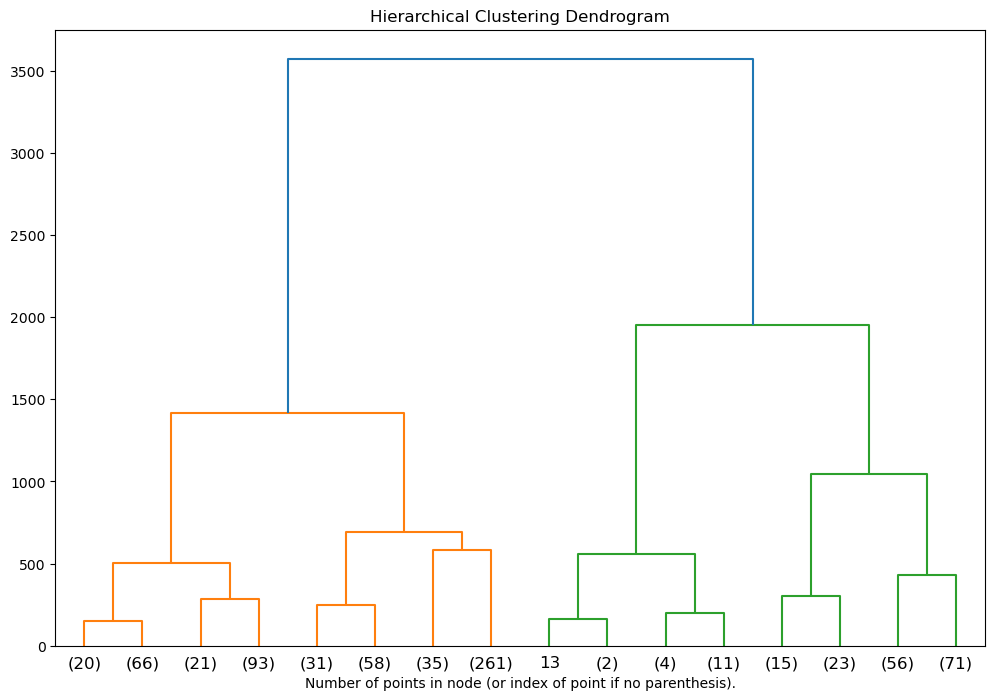

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
X=df.drop("Outcome",axis=1)
y=df["Outcome"]
#X=df.values
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model.fit(X)

# Plot dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


In [13]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Generate sample data
# X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Perform hierarchical clustering
model = AgglomerativeClustering(n_clusters=4)
labels = model.fit_predict(X)

# Compute silhouette score
silhouette = silhouette_score(X, labels)
print("Silhouette Score:", silhouette)

# Compute Davies-Bouldin index
davies_bouldin = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", davies_bouldin)

# Compute Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", calinski_harabasz)


Silhouette Score: 0.3903545584456188
Davies-Bouldin Index: 0.770628459996414
Calinski-Harabasz Index: 1015.5529875446337
